<a href="https://colab.research.google.com/github/WilPassion/WilPassion-MachineLearning_FATEC/blob/main/Aula_Arvore_de_Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Árvore de Decisão**##

A Árvore de Decisão é um dos algoritmos mais populares e intuitivos de machine learning. Ele é amplamente utilizado tanto para problemas de classificação quanto de regressão. Vou explicar como ela funciona de uma maneira mais prática:

Como funciona uma Árvore de Decisão?
Estrutura em forma de árvore:

A Árvore de Decisão se parece muito com uma árvore invertida, onde cada "nó" da árvore faz uma pergunta (ou seja, uma condição) sobre um atributo dos dados.
O caminho que seguimos na árvore depende das respostas "Sim" ou "Não" a essas perguntas.
Raiz, nós e folhas:

Raiz: O topo da árvore, onde começa a primeira divisão dos dados. A árvore faz uma pergunta com base na feature mais importante.
Nós: Cada nó interno da árvore faz uma pergunta baseada nos atributos (features) do dataset.
Folhas: Os nós finais que dão a decisão final. No caso de classificação, cada folha representará uma classe (exemplo: "Spam" ou "Não Spam"). No caso de regressão, cada folha será um valor numérico.
Divisões dos dados (split):

A Árvore de Decisão divide os dados em subgrupos de acordo com as condições aplicadas nos nós.
Cada divisão é feita de maneira a maximizar a pureza dos grupos, ou seja, a fazer com que os dados nos subgrupos estejam o mais homogêneos possível em relação à variável-alvo.
Critério de decisão:

Para determinar como dividir os dados, a árvore usa critérios como o Gini (para medir a pureza) ou a Entropia (baseada na teoria da informação). Para regressão, usa-se o erro quadrático médio.
Caminho até a decisão:

Depois que os dados passam pelos nós da árvore e seguem as divisões, eles chegam a uma folha, onde é feita a decisão final sobre a classe ou valor previsto.
Exemplo prático (classificação):
Imagine que você quer prever se uma pessoa irá comprar um carro com base em algumas características: idade, renda e número de filhos.

No nó da raiz, a primeira pergunta poderia ser "A pessoa tem uma renda maior que 5.000 reais?".
Se a resposta for "Sim", a árvore pode seguir para uma nova pergunta, como "A pessoa tem mais de 2 filhos?".
Se a resposta for "Não", pode ir para outro ramo da árvore, onde uma decisão final será tomada, como "Essa pessoa vai comprar um carro".
Cada caminho (ramo) da árvore representa um conjunto de condições que levam a uma decisão.

Vantagens:
Fácil de entender e interpretar: É possível visualizar o processo de tomada de decisão.
Pouco pré-processamento de dados: As Árvores de Decisão não precisam que os dados sejam normalizados ou escalados, e também lidam bem com valores faltantes.
Útil para problemas complexos: Elas podem capturar interações entre diferentes variáveis.
Desvantagens:
Tendência ao overfitting: Árvores de Decisão podem crescer muito e se ajustar demais aos dados de treinamento, perdendo a capacidade de generalizar.
Árvores grandes podem ser difíceis de interpretar: Embora simples em seu conceito básico, quando a árvore cresce muito, ela pode se tornar difícil de entender.

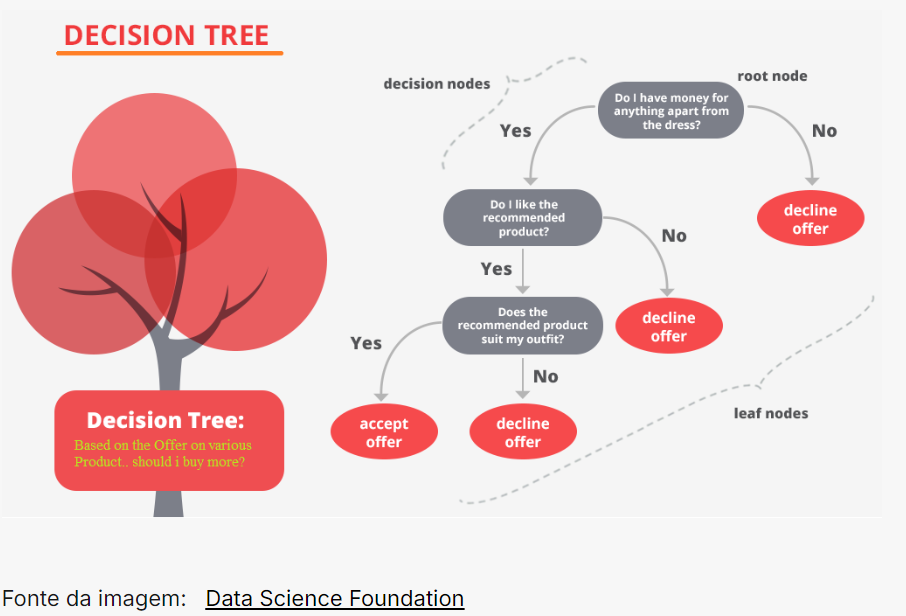
Fonte: https://blog.somostera.com/data-science/arvores-de-decisao

In [ ]:
from sklearn.datasets import load_iris # 150 amostras de flores Iris, divididas em três espécies: setosa, versicolor e virginica
from sklearn import tree # algoritmo de Árvore de Decisã
import pandas as pd
import sklearn.metrics as metrics # fornece várias métricas de avaliação para
from sklearn.model_selection import train_test_split # divide o dataset em duas ou mais partes: conjunto de treino e conjunto de teste.

iris = load_iris()
print(iris['DESCR'])

experimentos = [0.1, 0.25, 0.5, 0.75, 0.9]
for exp in experimentos:
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=exp, random_state=1)


    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
    clf = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    print("\nPorcentagem do TESTE = ", exp)
    print("\nMatriz de confusão detalhada:\n",
    pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], margins=True, margins_name='Todos'))
    print("Relatório sobre a qualidade:\n")
    print(metrics.classification_report(y_test, predictions, target_names=['Setosa', 'Versicolor', 'Virgínica']))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
niveis = [1, 2, 3, 4]
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=1)

for nivel in niveis:

    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=nivel)
    clf = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    print("\nNíveis = ", nivel)
    print("\nMatriz de confusão detalhada:\n",
    pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], margins=True, margins_name='Todos'))
    print("Relatório sobre a qualidade:\n")
    print(metrics.classification_report(y_test, predictions, target_names=['Setosa', 'Versicolor', 'Virgínica']))

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print("\nNíveis = ilimitado")
print("\nMatriz de confusão detalhada:\n",
pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], margins=True, margins_name='Todos'))
print("Relatório sobre a qualidade:\n")
print(metrics.classification_report(y_test, predictions, target_names=['Setosa', 'Versicolor', 'Virgínica']))


Níveis =  1

Matriz de confusão detalhada:
 Predito   0   2  Todos
Real                  
0        13   0     13
1         0  16     16
2         0   9      9
Todos    13  25     38
Relatório sobre a qualidade:

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       0.00      0.00      0.00        16
   Virgínica       0.36      1.00      0.53         9

    accuracy                           0.58        38
   macro avg       0.45      0.67      0.51        38
weighted avg       0.43      0.58      0.47        38


Níveis =  2

Matriz de confusão detalhada:
 Predito   0   1   2  Todos
Real                      
0        13   0   0     13
1         0  15   1     16
2         0   0   9      9
Todos    13  15  10     38
Relatório sobre a qualidade:

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.94      0.97        16
   Vir

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2) Agora vamos usar um conjunto de dados sobre Câncer de Mama, que tem
várias características de tumores com uma classe indicando se o mesmo é
maligno ou benigno. O objetivo deste experimento é criar um modelo em Árvore
de Decisão que possa, com base em valores destes atributos, prever a
malignidade de tumores não vistos antes. Repita todos os passos do
experimento acima com a base breast_cancer (veja trecho de código abaixo)

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# Imprima toda a descrição dos dados rodando:
print(cancer['DESCR'])
# 569 casos com 30 características
X = cancer['data']
y = cancer['target']

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
niveis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.25, random_state=1)

for nivel in niveis:

    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=nivel)
    clf = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    print("\nNíveis = ", nivel)
    print("\nMatriz de confusão detalhada:\n",
    pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], margins=True, margins_name='Todos'), )
    print("Relatório sobre a qualidade:\n")
    print(metrics.classification_report(y_test, predictions, target_names=cancer.target_names))



Níveis =  1

Matriz de confusão detalhada:
 Predito   0   1  Todos
Real                  
0        47   8     55
1        11  77     88
Todos    58  85    143
Relatório sobre a qualidade:

              precision    recall  f1-score   support

   malignant       0.81      0.85      0.83        55
      benign       0.91      0.88      0.89        88

    accuracy                           0.87       143
   macro avg       0.86      0.86      0.86       143
weighted avg       0.87      0.87      0.87       143


Níveis =  2

Matriz de confusão detalhada:
 Predito   0   1  Todos
Real                  
0        47   8     55
1        11  77     88
Todos    58  85    143
Relatório sobre a qualidade:

              precision    recall  f1-score   support

   malignant       0.81      0.85      0.83        55
      benign       0.91      0.88      0.89        88

    accuracy                           0.87       143
   macro avg       0.86      0.86      0.86       143
weighted avg       0.